#  Import Necessary Library

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# 1. Data Collection

In [3]:
bank = pd.read_csv('bank-full.csv',sep= ';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# 2. Data Understanding

In [4]:
bank.shape

(45211, 17)

In [5]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
bank.dtypes

age           int64
job           int32
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [13]:
print(bank.job.unique())
print(bank.marital.unique())
print(bank.education.unique())
print(bank.default.unique())
print(bank.housing.unique())
print(bank.loan.unique())
print(bank.contact.unique())
print(bank.month.unique())
print(bank.poutcome.unique())
print(bank.y.unique())

[ 4  9  2  1 11  5  0  7  6 10  3  8]
['married' 'single' 'divorced']
['tertiary' 'secondary' 'unknown' 'primary']
['married' 'single' 'divorced']
['no' 'yes']
['yes' 'no']
['no' 'yes']
['unknown' 'cellular' 'telephone']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
['unknown' 'failure' 'other' 'success']
['no' 'yes']


In [10]:
bank.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [30]:
corrr = bank.corr()

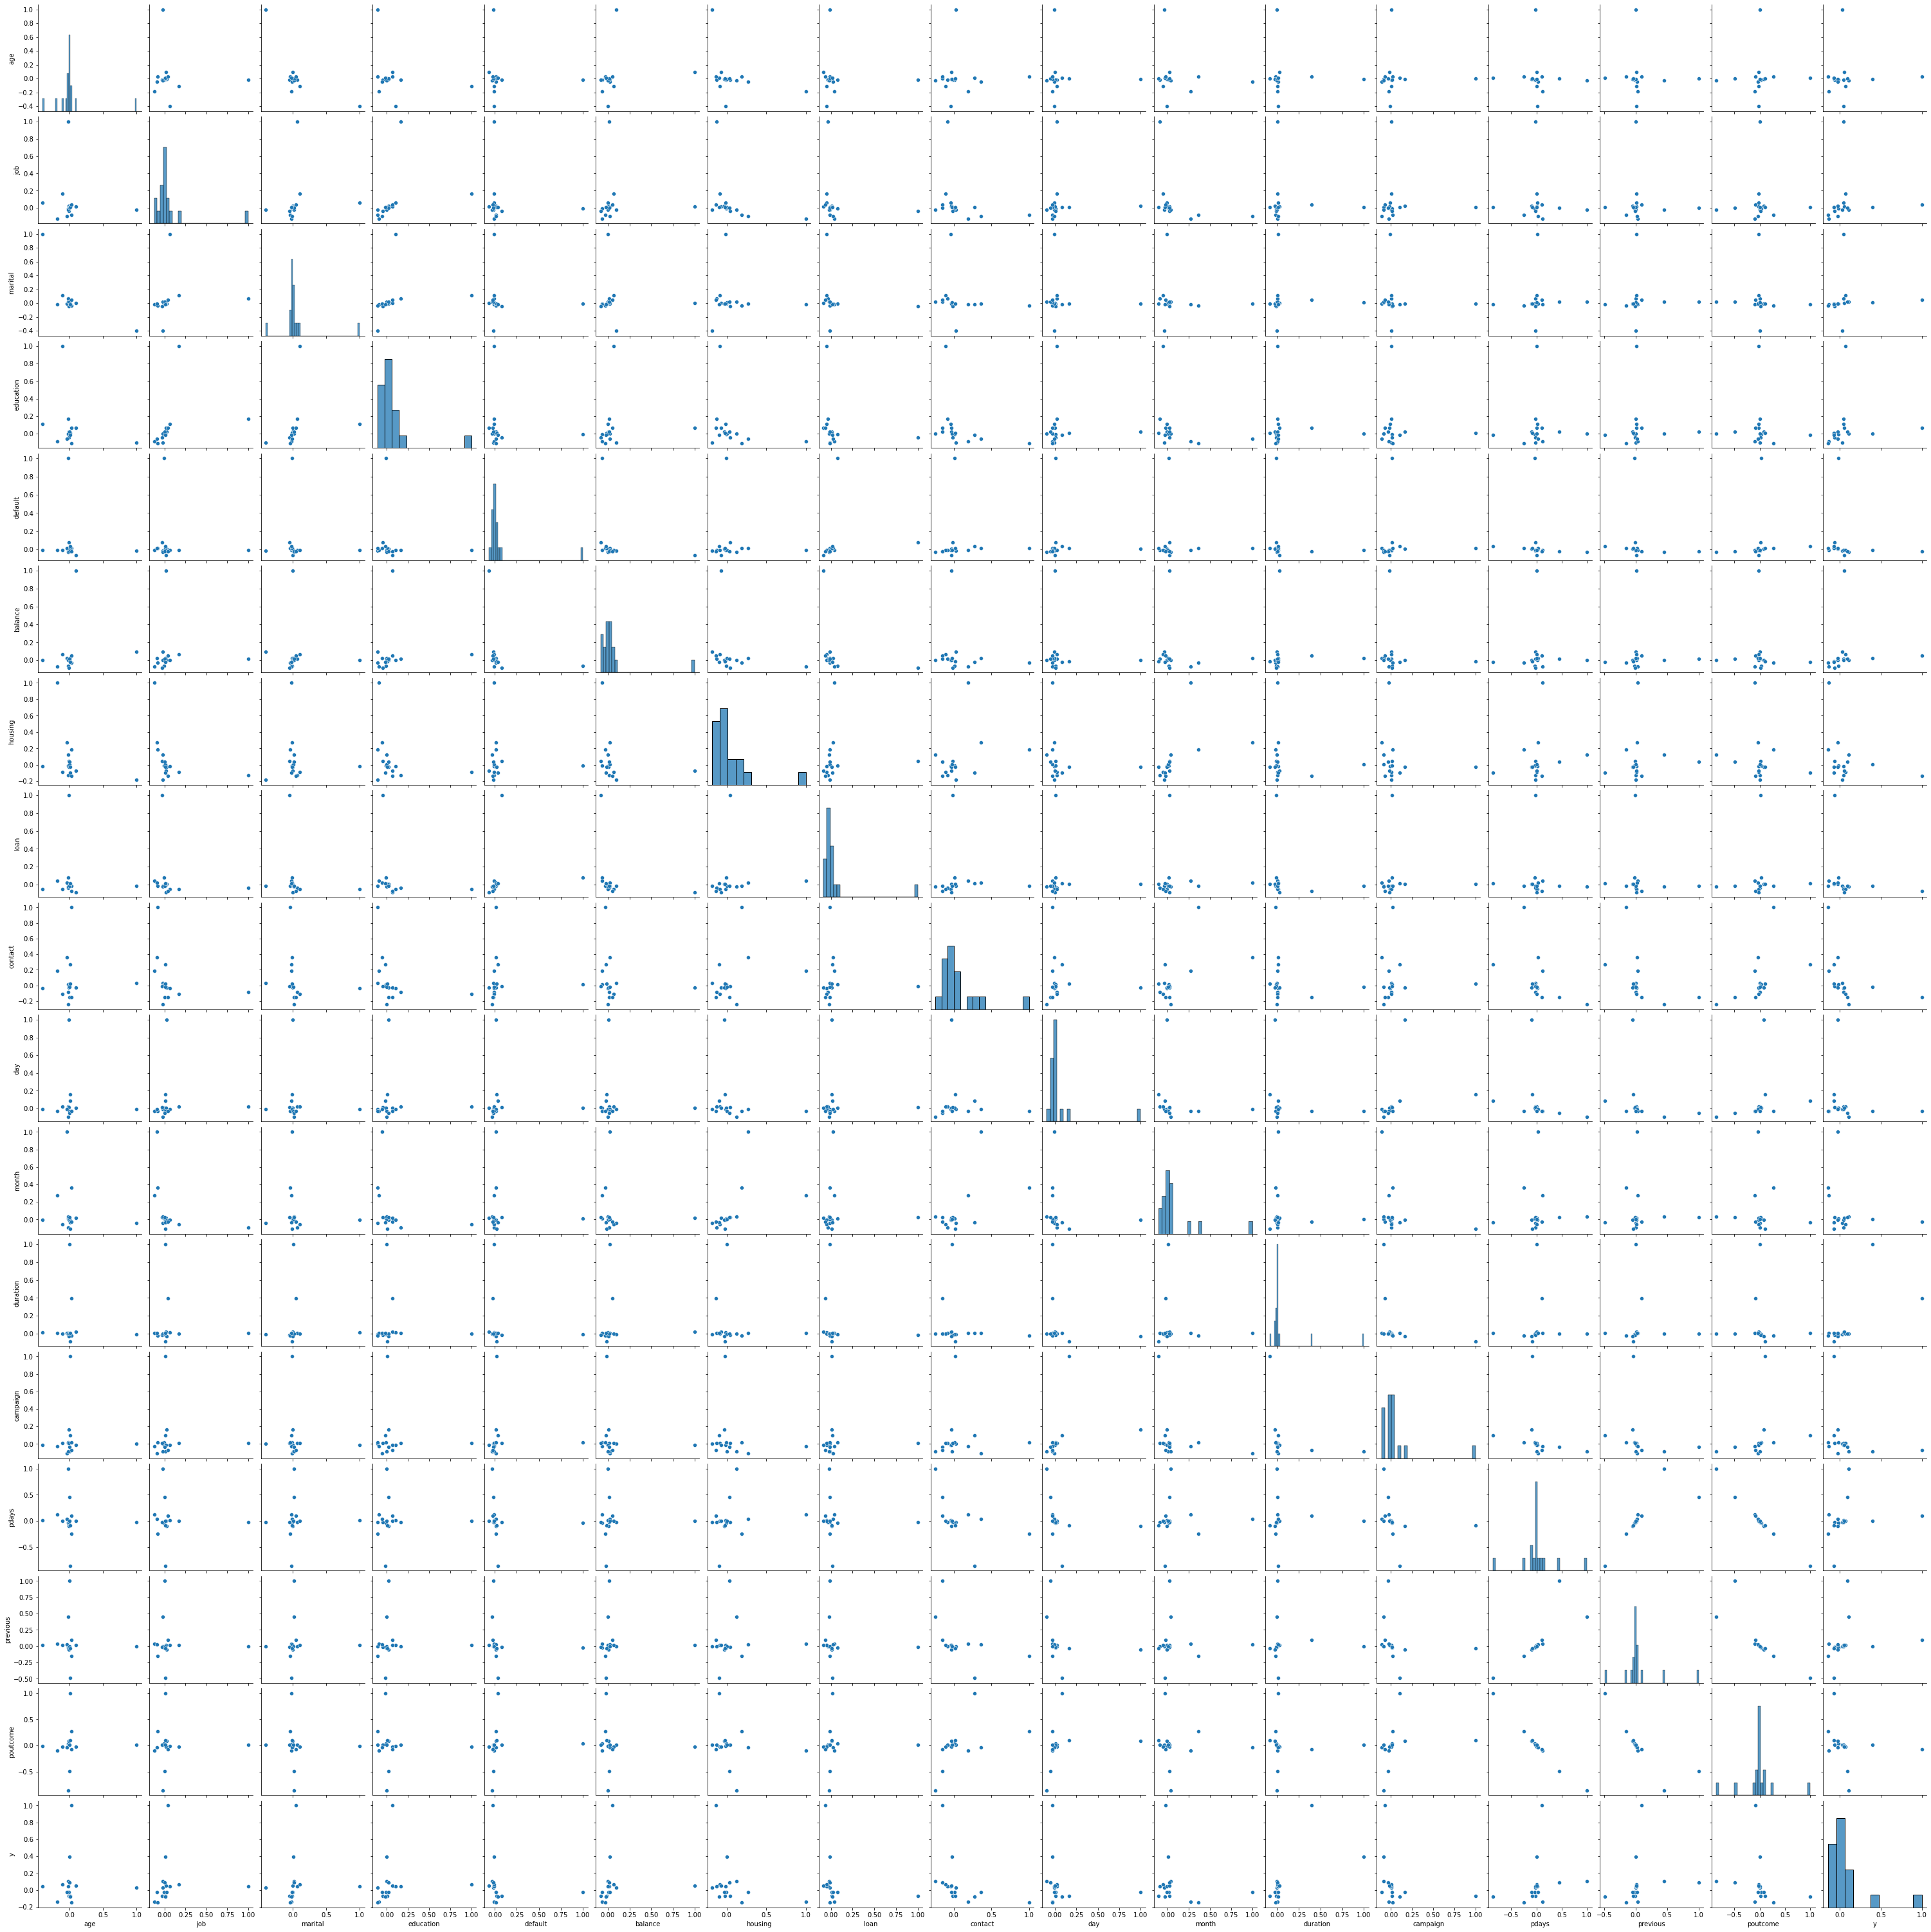

In [31]:
sns.pairplot(data=corrr)
plt.show()

<AxesSubplot:>

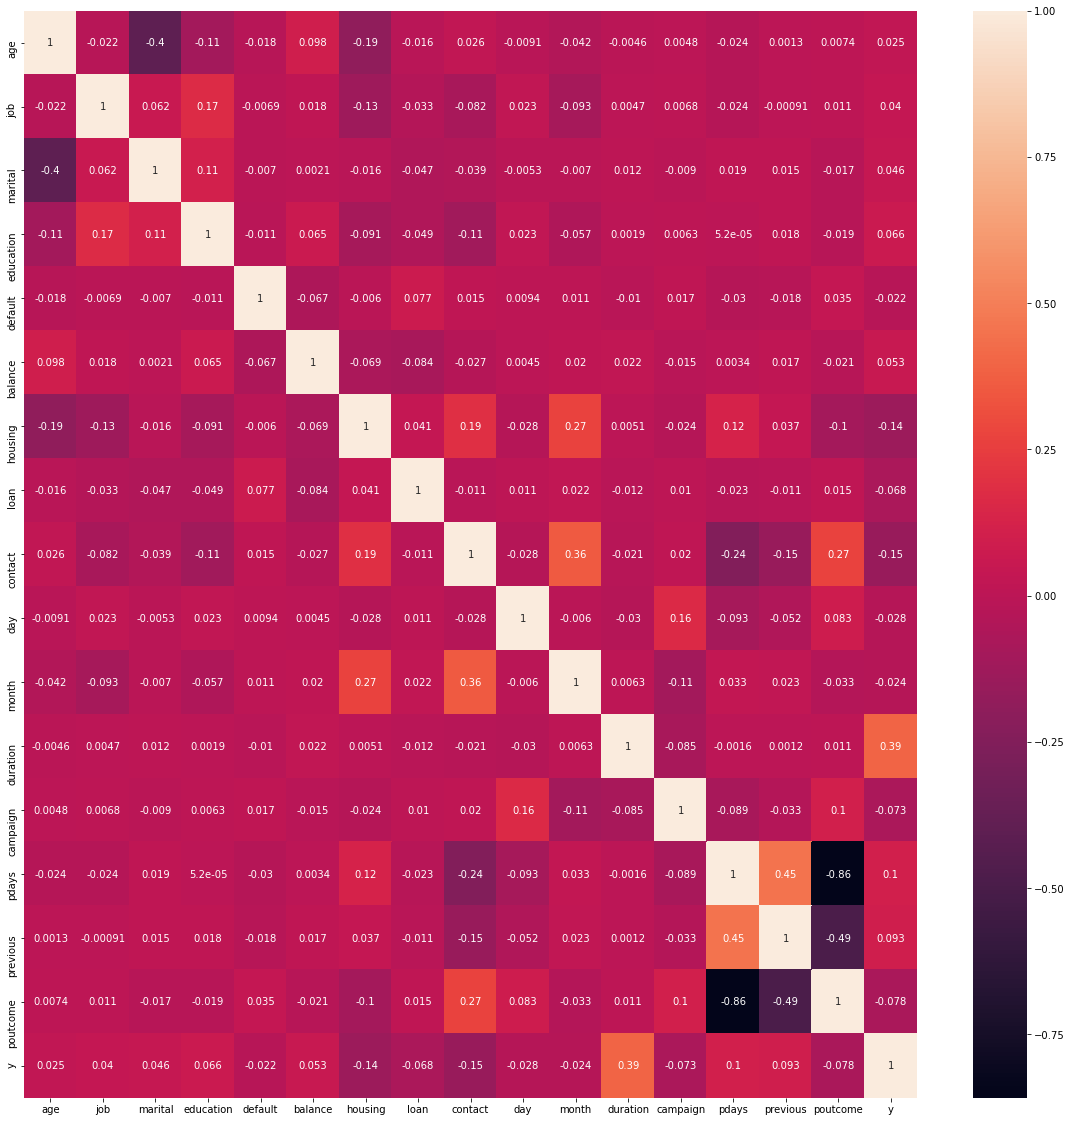

In [56]:
plt.figure(figsize=(20,20))
sns.heatmap(corrr,annot=True)

# 3. Data Preparation

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

bank['job']=le.fit_transform(bank['job'])
bank['marital']=le.fit_transform(bank['marital'])
bank['education']=le.fit_transform(bank['education'])
bank['default']=le.fit_transform(bank['default'])
bank['housing']=le.fit_transform(bank['housing'])
bank['loan']=le.fit_transform(bank['loan'])
bank['contact']=le.fit_transform(bank['contact'])
bank['month']=le.fit_transform(bank['month'])
bank['poutcome']=le.fit_transform(bank['poutcome'])
bank['y']=le.fit_transform(bank['y'])

In [15]:
bank.dtypes

age          int64
job          int64
marital      int32
education    int32
default      int32
balance      int64
housing      int32
loan         int32
contact      int32
day          int64
month        int32
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int32
y            int32
dtype: object

In [16]:
X = bank.drop('y',axis=1)
y = bank[['y']]

# 4. Model Building

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state =12,stratify=y)

In [25]:
X_train.shape,y_train.shape

((36168, 16), (36168, 1))

In [26]:
X_test.shape,y_test.shape

((9043, 16), (9043, 1))

# 6. Model training

In [35]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression()
lg_model.fit(X = X_train,y = y_train)

LogisticRegression()

In [36]:
lg_model.coef_

array([[-2.49701168e-02,  1.76018922e-02, -1.02524165e-01,
        -1.67015686e-02, -6.11829249e-03,  3.50376595e-05,
        -2.13511180e-01, -6.43178678e-02, -2.20198707e-01,
        -2.06368326e-02, -6.41245355e-02,  3.46750500e-03,
        -3.05816928e-01, -1.23789297e-03,  1.42292662e-01,
        -2.05179715e-01]])

In [37]:
lg_model.intercept_

array([-0.08324337])

# 7.Model Testing

#### For Training dataset

In [39]:
y_pred_train = lg_model.predict(X_train)
y_pred_train

array([0, 0, 0, ..., 0, 0, 0])

#### For test dataset

In [40]:
y_pred_test = lg_model.predict(X_test)
y_pred_test

array([0, 0, 0, ..., 1, 0, 0])

# 8.Model Evaluation

In [48]:
from sklearn.metrics import accuracy_score,r2_score,roc_auc_score,roc_curve,confusion_matrix,classification_report,

#### Training accuracy

In [51]:
print('accuracy score:',accuracy_score(y_train,y_pred_train))
print('r2_score:',r2_score(y_train,y_pred_train))
print('classification report:\n',classification_report(y_train,y_pred_train))
print('confussion matrix:\n',confusion_matrix(y_train,y_pred_train))

accuracy score: 0.8875801813758019
r2_score: -0.08831527491635227
classification report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     31937
           1       0.56      0.17      0.27      4231

    accuracy                           0.89     36168
   macro avg       0.73      0.58      0.60     36168
weighted avg       0.86      0.89      0.86     36168

confussion matrix:
 [[31362   575]
 [ 3491   740]]


0.5784476775865911


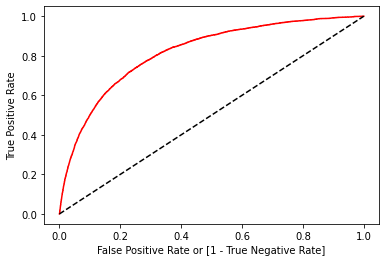

In [58]:
fpr, tpr, thresholds = roc_curve(y, lg_model.predict_proba (X)[:,1])

auc = roc_auc_score(y_train,y_pred_train)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

### Test accuracy

In [53]:
print('accuracy score:',accuracy_score(y_test,y_pred_test))
print('r2_score:',r2_score(y_test,y_pred_test))
print('classification report:\n',classification_report(y_test,y_pred_test))
print('confussion matrix:\n',confusion_matrix(y_test,y_pred_test))

accuracy score: 0.8875373216852814
r2_score: -0.08861144418942413
classification report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7985
           1       0.56      0.17      0.26      1058

    accuracy                           0.89      9043
   macro avg       0.73      0.58      0.60      9043
weighted avg       0.86      0.89      0.86      9043

confussion matrix:
 [[7846  139]
 [ 878  180]]
